In [3]:
import numpy as np # linear algebra
import pandas as pd # qqq processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import WeekdayLocator
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates  
import os
import yqqq_profiling
from pandas_profiling import ProfileReport


c:\Users\wltjr\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\wltjr\AppData\Local\Temp\ipykernel_7672\3043495716.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
qqq = pd.read_csv('./qqq.csv')

In [5]:
qqq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-25,174.210007,174.660004,173.399994,173.520004,167.900955,32608800
1,2019-02-26,173.100006,174.250000,172.809998,173.699997,168.075165,21939700
2,2019-02-27,172.899994,173.800003,171.759995,173.589996,167.968719,25162000
3,2019-02-28,173.050003,173.809998,172.699997,173.190002,167.581665,25085500
4,2019-03-01,174.440002,174.649994,173.179993,174.389999,168.742828,31431200


In [6]:
qqq['Date'] = pd.to_datetime(qqq['Date'])

In [7]:
print(qqq.describe())

                                Date         Open         High          Low  \
count                           1258  1258.000000  1258.000000  1258.000000   
mean   2021-08-22 00:44:38.537360896   296.285898   298.706296   293.741010   
min              2019-02-25 00:00:00   169.509995   171.259995   164.929993   
25%              2020-05-23 00:00:00   233.365002   234.552498   231.775005   
50%              2021-08-21 12:00:00   304.354996   307.675003   300.804993   
75%              2022-11-17 18:00:00   356.437492   360.129997   353.822487   
max              2024-02-22 00:00:00   436.940002   439.140015   434.649994   
std                              NaN    70.230866    70.563842    69.811908   

             Close    Adj Close        Volume  
count  1258.000000  1258.000000  1.258000e+03  
mean    296.408124   292.178971  4.842920e+07  
min     169.300003   164.910645  7.089000e+06  
25%     234.030002   228.612492  3.201115e+07  
50%     304.455002   301.138458  4.479840e+07  


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB
None

Data 5 baris pertama:
        Date        Open        High         Low       Close   Adj Close  \
0 2019-02-25  174.210007  174.660004  173.399994  173.520004  167.900955   
1 2019-02-26  173.100006  174.250000  172.809998  173.699997  168.075165   
2 2019-02-27  172.899994  173.800003  171.759995  173.589996  167.968719   
3 2019-02-28  173.050003  173.809998  172.699997  

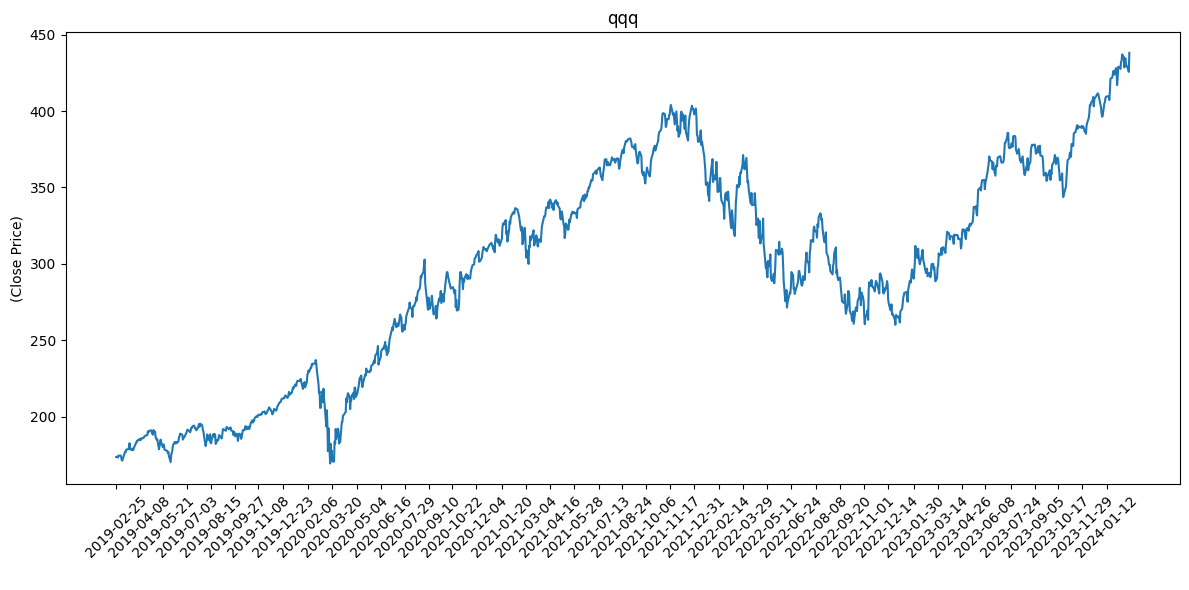

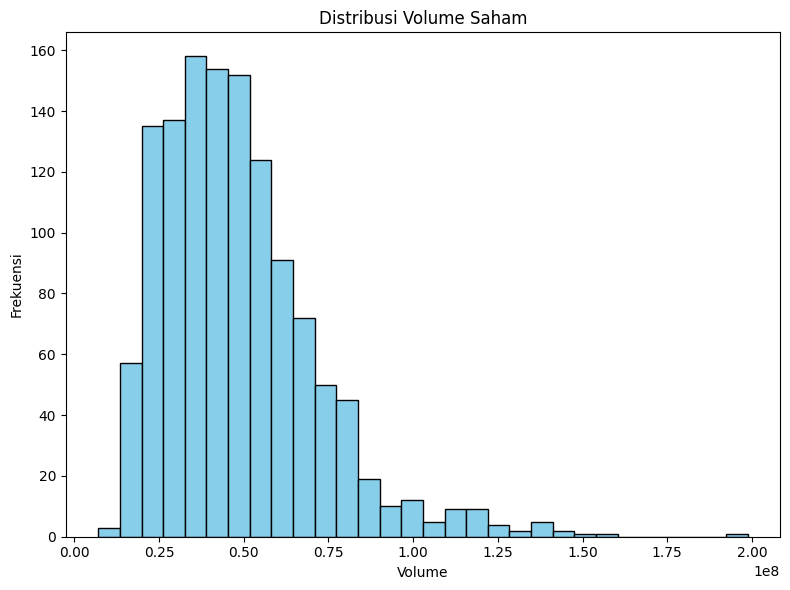

In [23]:
# Tampilkan informasi dataset
print("Informasi dataset:")
print(qqq.info())

# Tampilkan 5 baris pertama data
print("\nData 5 baris pertama:")
print(qqq.head())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(qqq.describe())

# Visualisasi tren harga saham dari waktu ke waktu (Close Price)
plt.figure(figsize=(12, 6))
plt.plot(qqq['Date'], qqq['Close'])
plt.title('qqq')
plt.xlabel(' ')
plt.ylabel('(Close Price)')
plt.xticks(qqq['Date'][::30], rotation=45) 
plt.tight_layout()
plt.show()

# Histogram volume
plt.figure(figsize=(8, 6))
plt.hist(qqq['Volume'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Volume Saham')
plt.xlabel('Volume')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [8]:
profile = ProfileReport(qqq, title="QQQ Data Profiling Report")

In [9]:
profile.to_file("./qqq_profiling_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 68.41it/s]


In [10]:
print(qqq.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
# 이후 그래프 생성 코드 작성


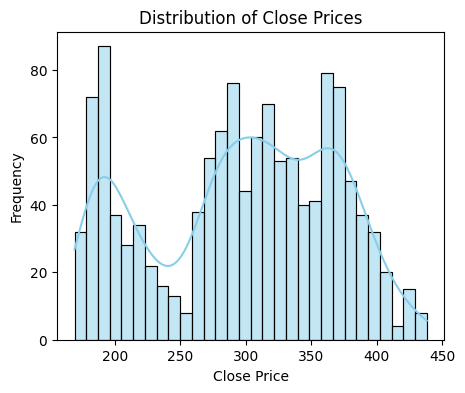

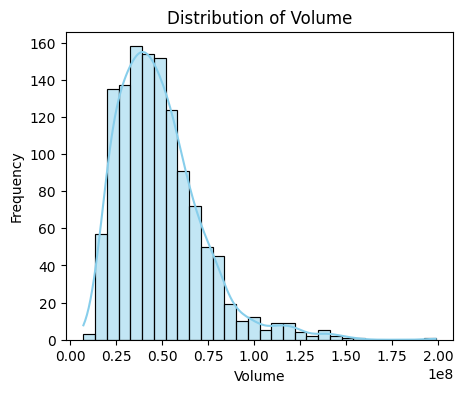

In [12]:
plt.figure(figsize=(5, 4))
sns.histplot(qqq['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(qqq['Volume'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

In [13]:
plt.show()

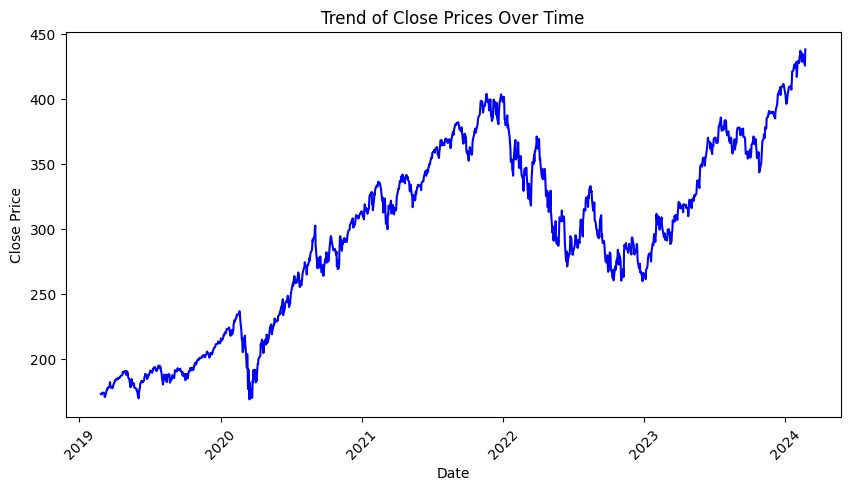

In [14]:
plt.figure(figsize=(10, 5))
# Plotting 'Close'
plt.plot(qqq['Date'], qqq['Close'], color='blue')
plt.title('Trend of Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

In [15]:
train_size = int(len(qqq) * 0.8)
train, test = qqq.iloc[:train_size], qqq.iloc[train_size:]

In [16]:
def create_features(qqq):
    qqq = qqq.copy()  # Ensure we're working with a copy of the DataFrame
    qqq.loc[:, 'day_of_week'] = qqq.index.dayofweek
    qqq.loc[:, 'day_of_month'] = qqq.index.day
    qqq.loc[:, 'month'] = qqq.index.month
    return qqq


# Convert the index to a DateTimeIndex
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# Now, let's reattempt the feature engineering
train = create_features(train)
test = create_features(test)

# Define features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day_of_week', 'day_of_month', 'month']
target = 'Close'

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor()

# Train the model
model.fit(train[features], train[target])

# Make predictions
predictions = model.predict(test[features])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test[target], predictions))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 7.909935618872101


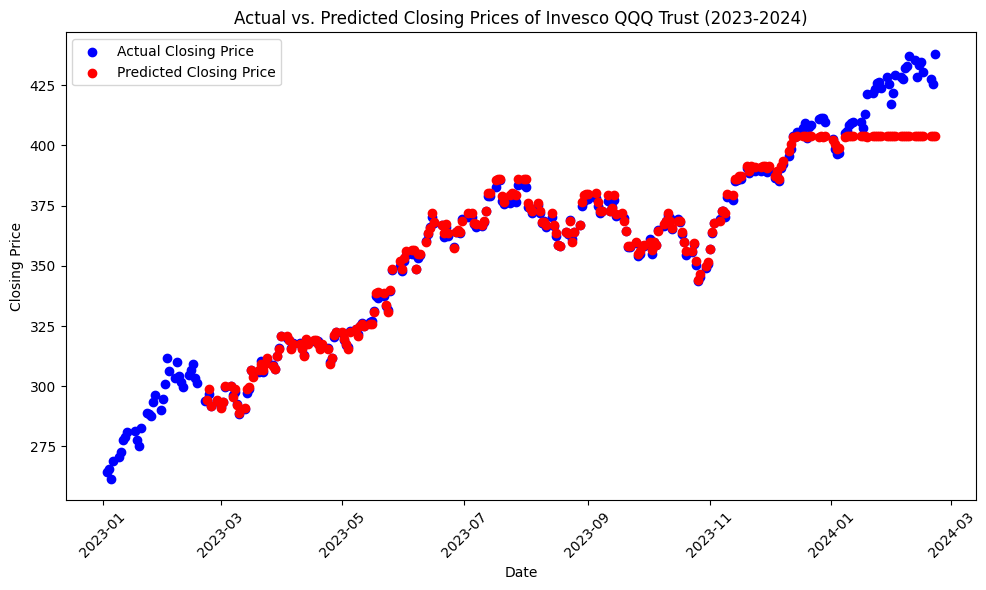

In [17]:
# Filter DataFrame for the period from 2023 to 2024
qqq_subset = qqq[(qqq['Date'] >= '2023-01-01') & (qqq['Date'] <= '2024-12-31')]


plt.figure(figsize=(10, 6))
plt.scatter(qqq_subset['Date'], qqq_subset['Close'], label='Actual Closing Price', color='blue')
plt.scatter(test['Date'], predictions, label='Predicted Closing Price', color='red')
plt.title('Actual vs. Predicted Closing Prices of Invesco QQQ Trust (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

MAE : 예측값과 실제값 사이의 절대 차이의 평균
MSE : 예측값과, 실제값 사이의 제곱 차이의 평균
R-SQUARED : 모델과 데이터의 변동을 설명 1에 가까우면 잘 설명한것

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(test[target], predictions)
print('Mean Absolute Error (MAE):', mae)

# Calculate MSE
mse = mean_squared_error(test[target], predictions)
print('Mean Squared Error (MSE):', mse)

# Calculate R-squared
r2 = r2_score(test[target], predictions)
print('R-squared (R^2):', r2)

Mean Absolute Error (MAE): 3.3805327430940206
Mean Squared Error (MSE): 62.56708149470157
R-squared (R^2): 0.9545392028153603
